In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import pandas as pd
import seaborn as sns
import numpy as np
% matplotlib inline

In [3]:
sf_crime = pd.read_csv('/content/drive/MyDrive/Data/SF_Crime/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv', index_col = 'PdId')

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
sf_crime = sf_crime.drop(columns = ['X','Y','location','SF Find Neighborhoods 2 2','Current Police Districts 2 2','Current Supervisor Districts 2 2','Analysis Neighborhoods 2 2','DELETE - Fire Prevention Districts 2 2','DELETE - Police Districts 2 2','DELETE - Supervisor Districts 2 2','DELETE - Zip Codes 2 2','DELETE - Neighborhoods 2 2','DELETE - 2017 Fix It Zones 2 2','Civic Center Harm Reduction Project Boundary 2 2','Fix It Zones as of 2017-11-06  2 2','DELETE - HSOC Zones 2 2','Fix It Zones as of 2018-02-07 2 2','CBD, BID and GBD Boundaries as of 2017 2 2','Areas of Vulnerability, 2016 2 2','Central Market/Tenderloin Boundary 2 2','Central Market/Tenderloin Boundary Polygon - Updated 2 2','HSOC Zones as of 2018-06-05 2 2','OWED Public Spaces 2 2','Neighborhoods 2'])
sf_crime

,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address
PdId,,,,,,,,,,
3114751606302,31147516,6302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST
5069701104134,50697011,4134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST
6074729204104,60747292,4104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST
7103536315201,71035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST
11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV
...,...,...,...,...,...,...,...,...,...,...
16099543005043,160995430,5043,BURGLARY,"BURGLARY OF RESIDENCE, UNLAWFUL ENTRY",Thursday,12/01/2016,17:30,NORTHERN,NONE,300 Block of FULTON ST
16093783009031,160937830,9031,OTHER OFFENSES,"MONEY, PROPERTY OR LABOR, FRAUDULENTLY OBTAINING",Monday,11/14/2016,00:01,INGLESIDE,NONE,0 Block of CONCORD ST
17078486916110,170784869,16110,DRUG/NARCOTIC,POSSESSION OF HEROIN FOR SALES,Tuesday,09/26/2017,01:38,CENTRAL,"ARREST, BOOKED",500 Block of BROADWAY ST


In [5]:
sf_crime = sf_crime.drop_duplicates().dropna()

In [6]:
sf_crime

,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address
PdId,,,,,,,,,,
3114751606302,31147516,6302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST
5069701104134,50697011,4134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST
6074729204104,60747292,4104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST
7103536315201,71035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST
11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV
...,...,...,...,...,...,...,...,...,...,...
16099543005043,160995430,5043,BURGLARY,"BURGLARY OF RESIDENCE, UNLAWFUL ENTRY",Thursday,12/01/2016,17:30,NORTHERN,NONE,300 Block of FULTON ST
16093783009031,160937830,9031,OTHER OFFENSES,"MONEY, PROPERTY OR LABOR, FRAUDULENTLY OBTAINING",Monday,11/14/2016,00:01,INGLESIDE,NONE,0 Block of CONCORD ST
17078486916110,170784869,16110,DRUG/NARCOTIC,POSSESSION OF HEROIN FOR SALES,Tuesday,09/26/2017,01:38,CENTRAL,"ARREST, BOOKED",500 Block of BROADWAY ST


In [7]:
def word_shortener(Weekday): 
    str_Weekday = str(Weekday)
    return Weekday[0:3]

In [8]:

sf_crime['New Time'] = pd.to_datetime(sf_crime.Time)

sf_crime['Year'] = pd.to_datetime(sf_crime.Date)

sf_crime['Full Year'] = sf_crime.Year.dt.year

sf_crime['Month'] = sf_crime.Year.dt.month_name()

sf_crime['Month Number']=sf_crime.Year.dt.month

sf_crime['Full Time'] = sf_crime['New Time'].dt.time

sf_crime.dtypes

#convert from string to float

def string_to_int(x):
  x_2 = x[0:2]
  int_x = int(x_2)
  return int_x

#determine if time is day or night.  Will be day if 7:00 am < 7:00 pm (Or 19:00)
def night_or_day(time):
  new_time = string_to_int(time)
  if new_time >= 7 and new_time<= 19: 
      return ("Day")
  else: 
      return ("Night")




In [9]:
sf_crime['Month'] = sf_crime['Month'].transform(word_shortener)

In [41]:
sf_crime

,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,New Time,Year,Full Year,Month,Month Number,Full Time
PdId,,,,,,,,,,,,,,,,
3114751606302,31147516,6302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,2021-10-12 10:00:00,2003-09-28,2003,Sep,9,10:00:00
5069701104134,50697011,4134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,2021-10-12 12:20:00,2005-06-22,2005,Jun,6,12:20:00
6074729204104,60747292,4104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,2021-10-12 00:55:00,2006-07-15,2006,Jul,7,00:55:00
7103536315201,71035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,2021-10-12 00:01:00,2007-09-25,2007,Sep,9,00:01:00
11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,2021-10-12 11:00:00,2011-09-24,2011,Sep,9,11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099543005043,160995430,5043,BURGLARY,"BURGLARY OF RESIDENCE, UNLAWFUL ENTRY",Thursday,12/01/2016,17:30,NORTHERN,NONE,300 Block of FULTON ST,2021-10-12 17:30:00,2016-12-01,2016,Dec,12,17:30:00
16093783009031,160937830,9031,OTHER OFFENSES,"MONEY, PROPERTY OR LABOR, FRAUDULENTLY OBTAINING",Monday,11/14/2016,00:01,INGLESIDE,NONE,0 Block of CONCORD ST,2021-10-12 00:01:00,2016-11-14,2016,Nov,11,00:01:00
17078486916110,170784869,16110,DRUG/NARCOTIC,POSSESSION OF HEROIN FOR SALES,Tuesday,09/26/2017,01:38,CENTRAL,"ARREST, BOOKED",500 Block of BROADWAY ST,2021-10-12 01:38:00,2017-09-26,2017,Sep,9,01:38:00


In [10]:
sf_crime = sf_crime[sf_crime['Full Year']!=2018]

sf_crime['Full Year'].value_counts()

2015    151459
2017    149487
2013    147664
2016    145993
2014    144844
2003    142803
2004    142054
2005    137048
2012    135464
2008    135242
2009    134309
2006    131856
2007    131771
2010    127758
2011    126713
Name: Full Year, dtype: int64

In [11]:
sf_crime['Time as Int'] = sf_crime['Time'].transform(string_to_int)

sf_crime['Time of Day'] = sf_crime['Time'].transform(night_or_day)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
sf_crime['Time as Int']

PdId
3114751606302     10
5069701104134     12
6074729204104      0
7103536315201      0
11082415274000    11
                  ..
17081224460150     8
16099543005043    17
16093783009031     0
17078486916110     1
16044156851040    11
Name: Time as Int, Length: 2084465, dtype: int64

In [13]:
sf_crime['Time of Day'].value_counts()

Day      1333675
Night     750790
Name: Time of Day, dtype: int64

In [46]:
sf_crime

,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,New Time,Year,Full Year,Month,Month Number,Full Time,Time as Int,Time of Day
PdId,,,,,,,,,,,,,,,,,,
3114751606302,31147516,6302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,2021-10-12 10:00:00,2003-09-28,2003,Sep,9,10:00:00,10,Day
5069701104134,50697011,4134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,2021-10-12 12:20:00,2005-06-22,2005,Jun,6,12:20:00,12,Day
6074729204104,60747292,4104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,2021-10-12 00:55:00,2006-07-15,2006,Jul,7,00:55:00,0,Night
7103536315201,71035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,2021-10-12 00:01:00,2007-09-25,2007,Sep,9,00:01:00,0,Night
11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,2021-10-12 11:00:00,2011-09-24,2011,Sep,9,11:00:00,11,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17081224460150,170812244,60150,SUICIDE,SUICIDE BY FIREARMS,Thursday,10/05/2017,08:40,NORTHERN,NONE,900 Block of LARKIN ST,2021-10-12 08:40:00,2017-10-05,2017,Oct,10,08:40:00,8,Day
16099543005043,160995430,5043,BURGLARY,"BURGLARY OF RESIDENCE, UNLAWFUL ENTRY",Thursday,12/01/2016,17:30,NORTHERN,NONE,300 Block of FULTON ST,2021-10-12 17:30:00,2016-12-01,2016,Dec,12,17:30:00,17,Day
16093783009031,160937830,9031,OTHER OFFENSES,"MONEY, PROPERTY OR LABOR, FRAUDULENTLY OBTAINING",Monday,11/14/2016,00:01,INGLESIDE,NONE,0 Block of CONCORD ST,2021-10-12 00:01:00,2016-11-14,2016,Nov,11,00:01:00,0,Night


In [14]:
def reformat_large_numbers(x): 
  if x >= 1000:
    x_new = (x/1000) 
    rounded_x = round(x_new, 1)
    #x_string = str(rounded_x)
    #return x_string + 'k'
    return rounded_x
  #else: 
    #return x

In [15]:
def year_shortener(year): 
    year_string = str(year)
    #if year_string[2] == '0':
      #return "'0" + year_string[2:4]
    #else:
    return "'" + year_string[2:4]


In [16]:
sf_crime['Full Year'] = sf_crime['Full Year'].transform(year_shortener)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
def number_shortener(x): 
  new_x = x/1000
  return new_x

In [18]:
sf_crime['Day Index']=sf_crime.Year.dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
sf_crime.rename(columns={'DayOfWeek':'Day of the Week'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
sf_crime['Day of the Week'].value_counts()

Friday       317268
Wednesday    305039
Saturday     302209
Thursday     297419
Tuesday      296215
Monday       288223
Sunday       278092
Name: Day of the Week, dtype: int64

In [21]:
daily_crime = sf_crime.groupby(by=['Day Index', 'Day of the Week', 'Time of Day'], as_index=False)['IncidntNum'].count()

In [55]:
daily_crime

,Day Index,Day of the Week,Time of Day,IncidntNum
0,0,Monday,Day,191426
1,0,Monday,Night,96797
2,1,Tuesday,Day,197580
3,1,Tuesday,Night,98635
4,2,Wednesday,Day,205983
5,2,Wednesday,Night,99056
6,3,Thursday,Day,196083
7,3,Thursday,Night,101336
8,4,Friday,Day,202402
9,4,Friday,Night,114866


In [22]:
daily_crime2 = sf_crime.groupby(by=['Day Index', 'Day of the Week'], as_index=False)['IncidntNum'].count()

In [57]:
daily_crime2

,Day Index,Day of the Week,IncidntNum
0,0,Monday,288223
1,1,Tuesday,296215
2,2,Wednesday,305039
3,3,Thursday,297419
4,4,Friday,317268
5,5,Saturday,302209
6,6,Sunday,278092


In [23]:
daily_crime.rename(columns={'IncidntNum':'Total Number of Incidents'}, inplace=True)

In [24]:
daily_crime2.rename(columns={'IncidntNum':'Total Number of Incidents'}, inplace=True)

In [25]:
daily_crime['Day of the Week']=daily_crime['Day of the Week'].transform(word_shortener)

In [26]:
daily_crime2['Day of the Week']=daily_crime2['Day of the Week'].transform(word_shortener)

In [61]:
daily_crime2

,Day Index,Day of the Week,Total Number of Incidents
0,0,Mon,288223
1,1,Tue,296215
2,2,Wed,305039
3,3,Thu,297419
4,4,Fri,317268
5,5,Sat,302209
6,6,Sun,278092


In [27]:
daily_crime['Total Number of Incidents(In Thousands)'] = daily_crime['Total Number of Incidents'].transform(number_shortener)

In [28]:
daily_crime2['Total Number of Incidents(In Thousands)'] = daily_crime2['Total Number of Incidents'].transform(number_shortener)

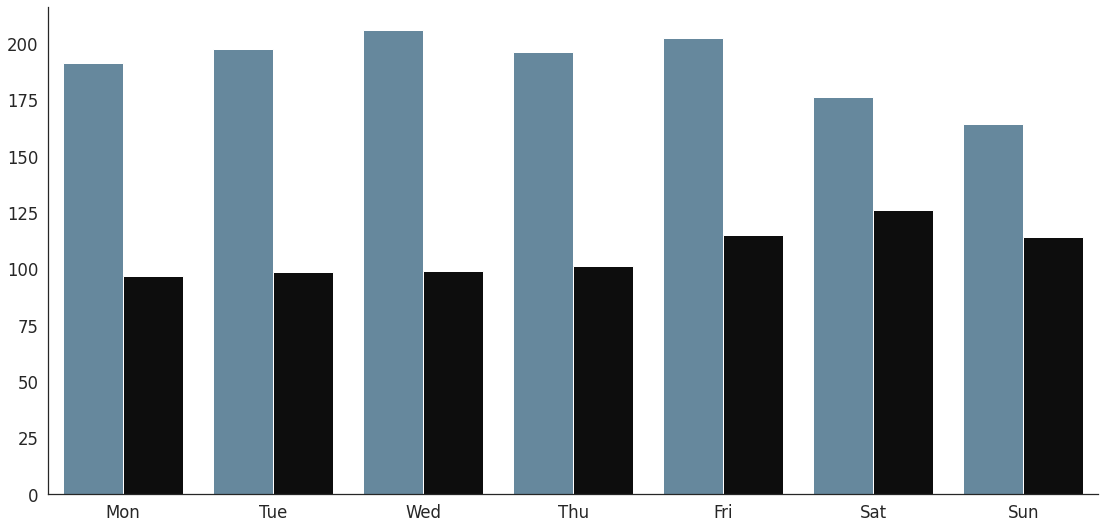

In [29]:
sns.set(font_scale=1.5, style='white')

time_of_day_chart = sns.catplot(kind='bar',
 data = daily_crime, 
 x='Day of the Week',
  y='Total Number of Incidents(In Thousands)', 
  height = 8, 
  aspect = 2,
  hue = 'Time of Day', 
  legend=None,
  palette = {
      'Day': '#5D8AA6',
      'Night': '#0D0D0D'
  })

time_of_day_chart.set(ylabel=None, xlabel=None)
time_of_day_chart.savefig('Day vs Night.png')

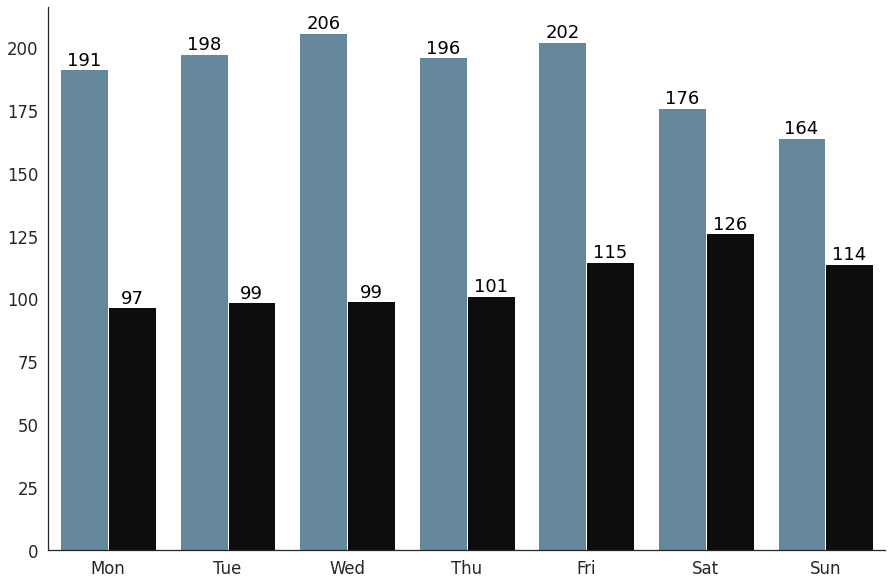

In [30]:
#sns.set(font_scale=1.5, style='white')

plt.figure(figsize=(15,10))

Day_n_Nite = sns.barplot(
    x='Day of the Week',
    y='Total Number of Incidents(In Thousands)', 
    data=daily_crime, 
     hue = 'Time of Day',
  palette = {
      'Day': '#5D8AA6',
      'Night': '#0D0D0D'
  })


sns.despine();

for p in Day_n_Nite.patches:
        Day_n_Nite.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
Day_n_Nite.set(ylabel=None, xlabel=None)


Day_n_Nite.get_legend().remove()

Day_n_Nite.figure.savefig('Day n Nite2.png')

In [24]:
sf_crime

,IncidntNum,Incident Code,Category,Descript,Day of the Week,Date,Time,PdDistrict,Resolution,Address,New Time,Year,Full Year,Month,Month Number,Full Time,Time as Int,Time of Day,Day Index
PdId,,,,,,,,,,,,,,,,,,,
3114751606302,31147516,6302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,2021-10-12 10:00:00,2003-09-28,'03,Sep,9,10:00:00,10,Day,6
5069701104134,50697011,4134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,2021-10-12 12:20:00,2005-06-22,'05,Jun,6,12:20:00,12,Day,2
6074729204104,60747292,4104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,2021-10-12 00:55:00,2006-07-15,'06,Jul,7,00:55:00,0,Night,5
7103536315201,71035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,2021-10-12 00:01:00,2007-09-25,'07,Sep,9,00:01:00,0,Night,1
11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,2021-10-12 11:00:00,2011-09-24,'11,Sep,9,11:00:00,11,Day,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17081224460150,170812244,60150,SUICIDE,SUICIDE BY FIREARMS,Thursday,10/05/2017,08:40,NORTHERN,NONE,900 Block of LARKIN ST,2021-10-12 08:40:00,2017-10-05,'17,Oct,10,08:40:00,8,Day,3
16099543005043,160995430,5043,BURGLARY,"BURGLARY OF RESIDENCE, UNLAWFUL ENTRY",Thursday,12/01/2016,17:30,NORTHERN,NONE,300 Block of FULTON ST,2021-10-12 17:30:00,2016-12-01,'16,Dec,12,17:30:00,17,Day,3
16093783009031,160937830,9031,OTHER OFFENSES,"MONEY, PROPERTY OR LABOR, FRAUDULENTLY OBTAINING",Monday,11/14/2016,00:01,INGLESIDE,NONE,0 Block of CONCORD ST,2021-10-12 00:01:00,2016-11-14,'16,Nov,11,00:01:00,0,Night,0


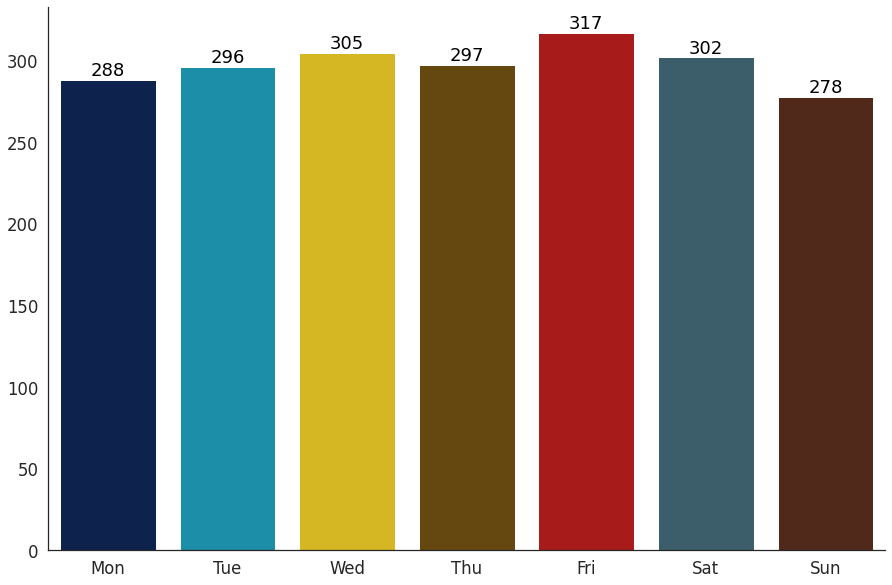

In [66]:
plt.figure(figsize=(15,10))

graph = sns.barplot( x='Day of the Week',
    y='Total Number of Incidents(In Thousands)', 
    data=daily_crime2,            
    palette ={
        'Mon': '#021F59',
        'Tue': '#069DBF',
        'Wed': '#F2CB05',
        'Thu':'#734B02',
        'Fri':'#BF0404', 
        'Sat':'#346173',
        'Sun':'#592512'
    })

sns.despine();

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
graph.set(ylabel=None, xlabel=None)

graph.figure.savefig('Daily CrimeV3.png')

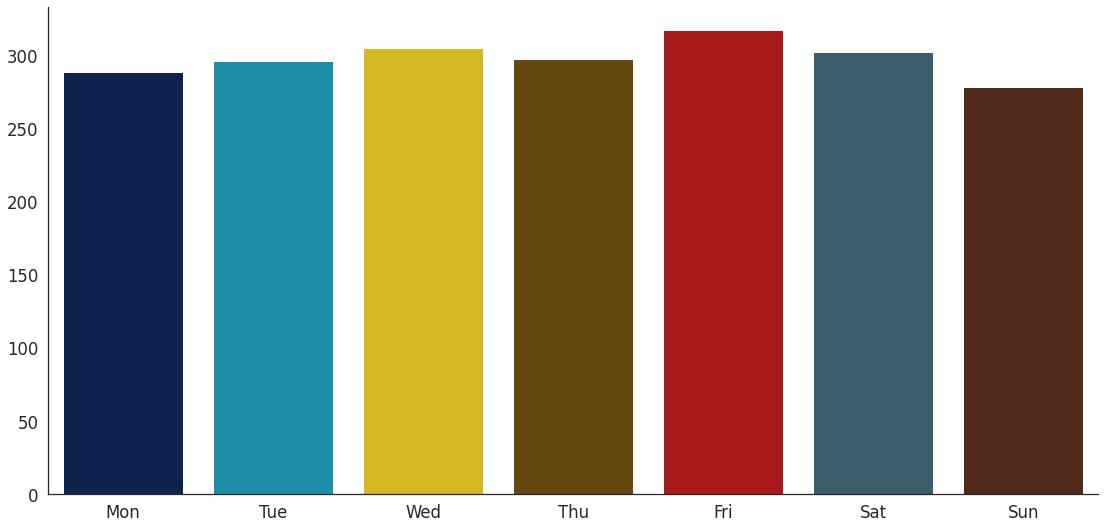

In [34]:

sns.set(font_scale=1.5, style='white')

daily_crime_chart = sns.catplot(
    kind='bar', 
    data = daily_crime2, 
    x='Day of the Week', 
    y='Total Number of Incidents(In Thousands)', 
    height = 8,
    aspect =2, 
    palette ={
        'Mon': '#021F59',
        'Tue': '#069DBF',
        'Wed': '#F2CB05',
        'Thu':'#734B02',
        'Fri':'#BF0404', 
        'Sat':'#346173',
        'Sun':'#592512'
    })
daily_crime_chart.set(ylabel=None, xlabel=None)

daily_crime_chart.savefig('Daily Crime.png')

In [31]:
crime_by_year = sf_crime.groupby(by=['Full Year', 'Category'], as_index=False)['IncidntNum'].count()
crime_by_year.sort_values(by=['IncidntNum', 'Category'], ascending=False, inplace=True)
sf_crime.Category.value_counts()

LARCENY/THEFT                  464364
OTHER OFFENSES                 296411
NON-CRIMINAL                   231689
ASSAULT                        163158
VEHICLE THEFT                  124759
DRUG/NARCOTIC                  116352
VANDALISM                      111933
WARRANTS                        98234
BURGLARY                        88971
SUSPICIOUS OCC                  77392
ROBBERY                         53417
MISSING PERSON                  43297
FRAUD                           40540
FORGERY/COUNTERFEITING          22800
SECONDARY CODES                 21905
WEAPON LAWS                     20397
TRESPASS                        18681
PROSTITUTION                    16453
STOLEN PROPERTY                 11193
DISORDERLY CONDUCT               9838
DRUNKENNESS                      9676
RECOVERED VEHICLE                8688
SEX OFFENSES, FORCIBLE           8471
DRIVING UNDER THE INFLUENCE      5560
KIDNAPPING                       4228
ARSON                            3778
EMBEZZLEMENT

In [32]:
top_five_crimes = ['LARCENY/THEFT', 'NON-CRIMINAL', 'OTHER OFFENSES', 'ASSAULT', 'VEHICLE THEFT']

sub_crime_data = crime_by_year.loc[:, ['Category', 'Full Year', 'IncidntNum']]

five_crimes = sub_crime_data[sub_crime_data.Category.isin(top_five_crimes)].copy()

five_crimes.rename(columns={'IncidntNum':'Total Number of Crimes'}, inplace=True)

five_crimes['Total Number of Crimes(In Thousands)'] = five_crimes['Total Number of Crimes'].transform(number_shortener)

five_crimes.sort_values(by=['Full Year'], ascending=False)

,Category,Full Year,Total Number of Crimes,Total Number of Crimes(In Thousands)
520,LARCENY/THEFT,'17,47714,47.714
525,OTHER OFFENSES,'17,17890,17.890
539,VEHICLE THEFT,'17,5705,5.705
524,NON-CRIMINAL,'17,17328,17.328
506,ASSAULT,'17,11613,11.613
...,...,...,...,...
1,ASSAULT,'03,11409,11.409
32,VEHICLE THEFT,'03,15276,15.276
20,OTHER OFFENSES,'03,20753,20.753
15,LARCENY/THEFT,'03,26185,26.185


In [33]:
five_crimes.dtypes

Category                                 object
Full Year                                object
Total Number of Crimes                    int64
Total Number of Crimes(In Thousands)    float64
dtype: object

In [34]:
five_crimes_not_2018 = five_crimes[five_crimes['Full Year']!=2018]

five_crimes_not_2018['Full Year'].value_counts()

'14    5
'13    5
'06    5
'15    5
'12    5
'17    5
'04    5
'11    5
'10    5
'03    5
'16    5
'09    5
'05    5
'08    5
'07    5
Name: Full Year, dtype: int64

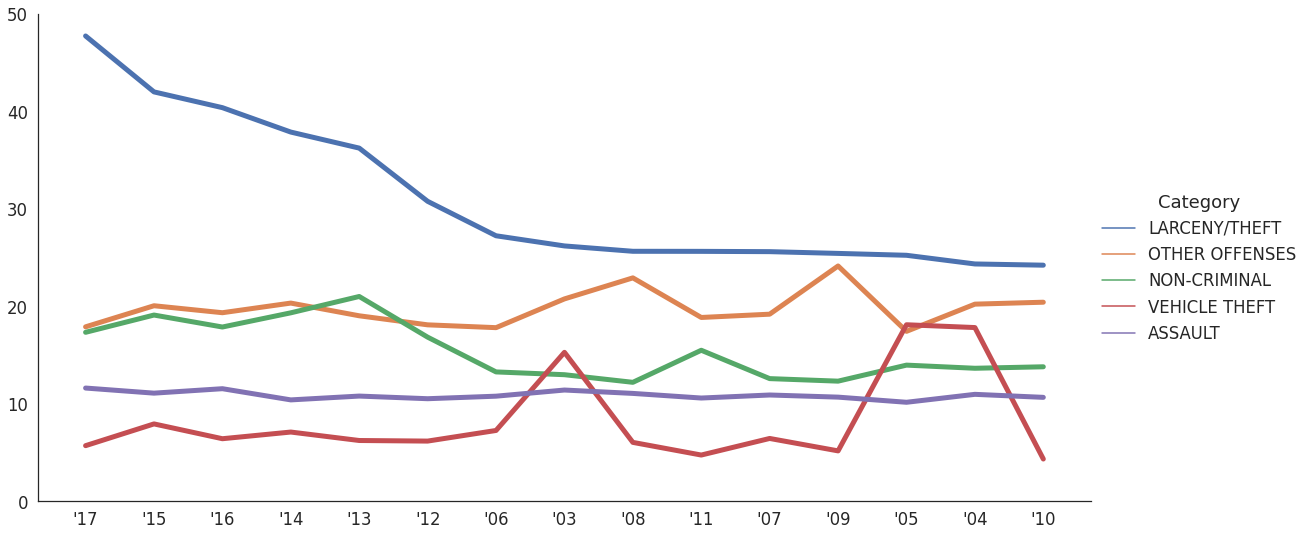

In [35]:
sns.set(font_scale=1.5, style='white')

g = sns.relplot(
    kind="line", 
    data=five_crimes_not_2018, 
    x='Full Year', 
    y='Total Number of Crimes(In Thousands)',
    # Separate lines by type  
    # Height and aspect ratio of chart
    height=8, 
    aspect=2,
    # Explicit colors
    # Line width
    linewidth=5,
    hue= 'Category'
)

#ax = g.axes[0,0]

g.set(ylim=(0,50), ylabel=None, xlabel=None)

plt.show()

g.savefig('Top 5 Crimes_V1.png')

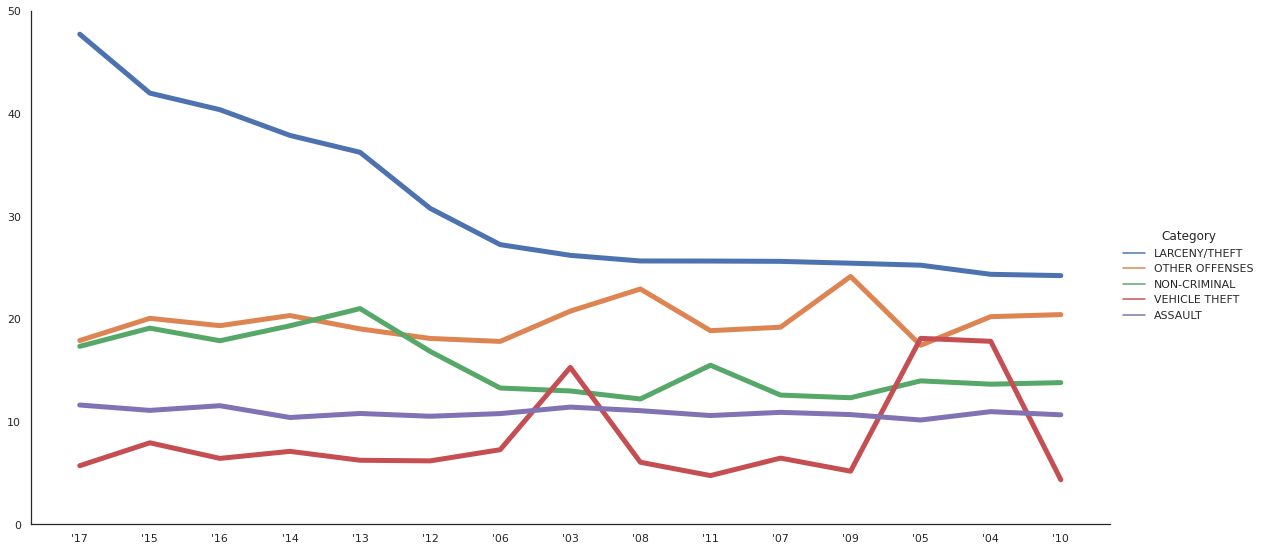

In [36]:
sns.set_theme(style="white")
g = sns.relplot(
    kind="line", 
    data=five_crimes, 
    x='Full Year', 
    y='Total Number of Crimes(In Thousands)',
    # Separate lines by type  
    # Height and aspect ratio of chart
    height=8, 
    aspect=2,
    # Explicit colors
    # Line width
    linewidth=5,
    hue= 'Category'
)

ax = g.axes[0,0]

g.set(ylim=(0,50), ylabel=None, xlabel=None)

g.savefig('Top 5 Crimes.png')

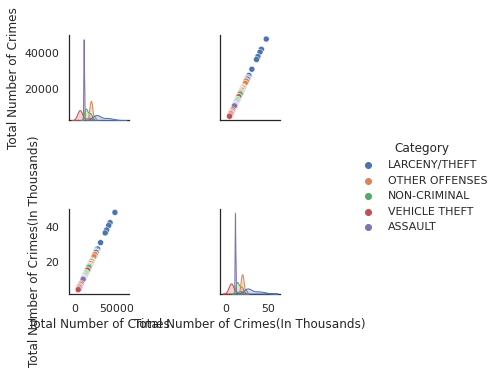

In [37]:
sns.pairplot(five_crimes, hue="Category", height=2.5)

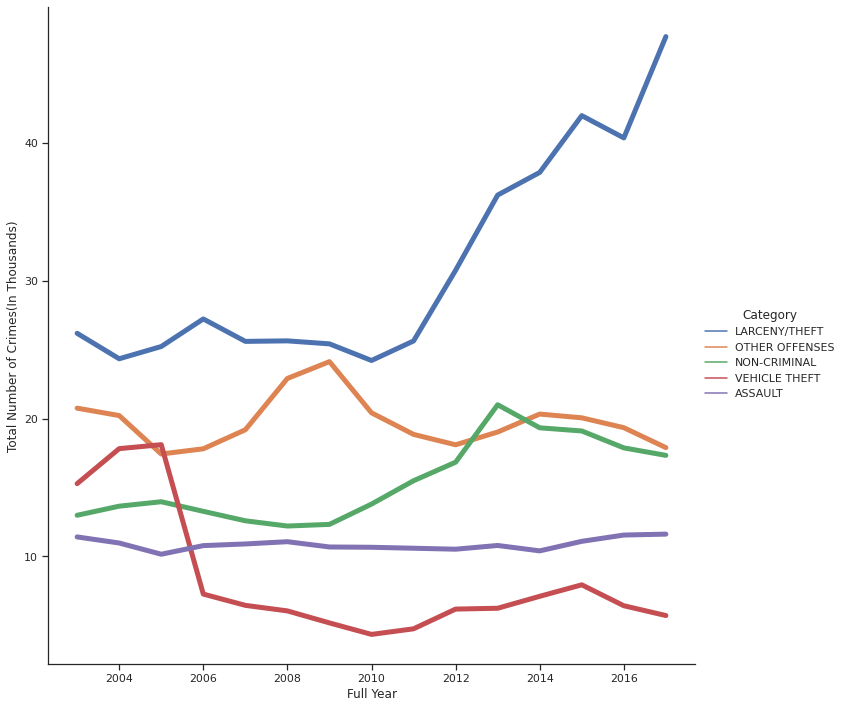

In [42]:
sns.set_theme(style="ticks")

# Define the palette as a list to specify exact values

# Plot the lines on two facets
sns.relplot(
    data=five_crimes,
    x="Full Year", y="Total Number of Crimes(In Thousands)",
    hue="Category",
    kind="line",
    height=10, aspect= 1, facet_kws=dict(sharex=False),
    linewidth= 5
)

In [43]:
crime_day_year = sf_crime.groupby(by=['Day Index', 'Day of the Week', 'Full Year'], as_index=False)['IncidntNum'].count()

crime_day_year['Total Crimes(In Thousands)']= crime_day_year['IncidntNum'].transform(number_shortener)

crime_day_year['Day of the Week']=crime_day_year['Day of the Week'].transform(word_shortener)

In [46]:
daily_line_chart = sns.relplot(
    kind='line', 
    data = crime_day_year, 
    x='Full Year', 
    y='Total Crimes(In Thousands)', 
    hue='Day of the Week',
    linewidth=4,
    height = 10,
    aspect =2, 
    palette ={
        'Mon': '#021F59',
        'Tue': '#069DBF',
        'Wed': '#F2CB05',
        'Thu':'#734B02',
        'Fri':'#BF0404', 
        'Sat':'#346173',
        'Sun':'#592512'
    })
daily_line_chart.set(ylabel=None, xlabel=None)

NameError: ignored

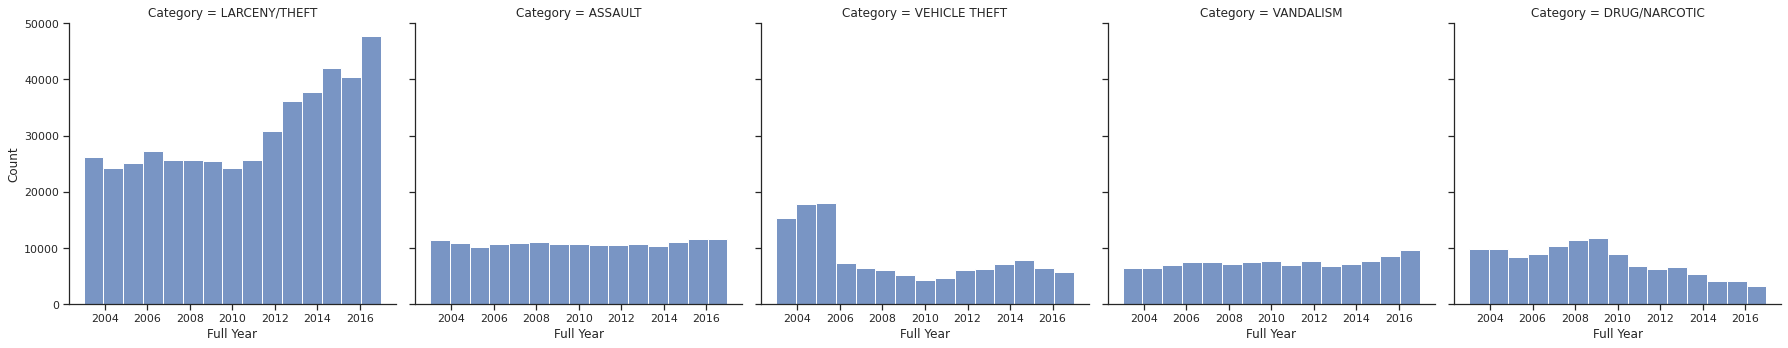

In [44]:

top_five_crimes = ['LARCENY/THEFT', 'DRUG/NARCOTIC', 'VANDALISM', 'ASSAULT', 'VEHICLE THEFT']

sub_crime_data = sf_crime.loc[:, ['Category', 'Full Year', 'IncidntNum']]

popular_crimes = sub_crime_data[sub_crime_data.Category.isin(top_five_crimes)].copy()

popular_crimes.sort_values(by=['Category'], ascending=False)

top_5_hist = sns.displot(kind = 'hist', data = popular_crimes, x = 'Full Year', col = 'Category', bins = 15)

top_5_hist.savefig('Top 5 Crimes Hist.png')

In [45]:
total_crime = sf_crime.groupby(by=['Full Year'], as_index = False)['IncidntNum'].count()

total_crime['Total Number of Crimes(In Thousands)'] = total_crime['IncidntNum'].transform(number_shortener)


In [46]:
total_crime

,Full Year,IncidntNum,Total Number of Crimes(In Thousands)
0,2003,142803,142.803
1,2004,142054,142.054
2,2005,137048,137.048
3,2006,131856,131.856
4,2007,131771,131.771
5,2008,135242,135.242
6,2009,134309,134.309
7,2010,127758,127.758
8,2011,126713,126.713
9,2012,135464,135.464


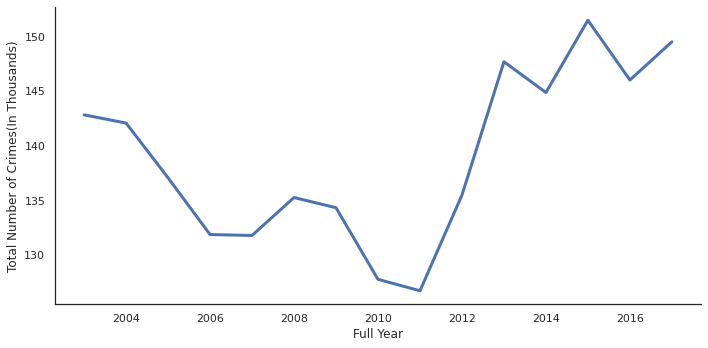

In [47]:
sns.set_theme(style="white")
total_crime= sns.relplot(
    kind="line", 
    data=total_crime, 
    x='Full Year', 
    y='Total Number of Crimes(In Thousands)',
    # Separate lines by type  
    # Height and aspect ratio of chart
    height=5, 
    aspect=2,
    # Explicit colors
    # Line width
    linewidth=3
)


In [48]:
popular_day = sf_crime.groupby(by=['Date', 'Full Year', 'Year'], as_index=False)['IncidntNum'].count()

popular_day.sort_values(by=['IncidntNum'], ascending=False).head(10)

#strikes_groupby = strikes.groupby(by=['Species Name'])
#strikes_groupby.get_group('BALD EAGLE')

,Date,Full Year,Year,IncidntNum
8,01/01/2011,2011,2011-01-01,627
4573,11/01/2013,2013,2013-11-01,604
10,01/01/2013,2013,2013-01-01,604
3,01/01/2006,2006,2006-01-01,587
0,01/01/2003,2003,2003-01-01,582
2685,06/28/2015,2015,2015-06-28,582
6,01/01/2009,2009,2009-01-01,567
13,01/01/2016,2016,2016-01-01,543
7,01/01/2010,2010,2010-01-01,543
1355,04/01/2004,2004,2004-04-01,539


In [49]:
sf_crime

,IncidntNum,Incident Code,Category,Descript,Day of the Week,Date,Time,PdDistrict,Resolution,Address,New Time,Year,Full Year,Month Number,Full Time,Month,Time as Int,Time of Day,Day Index
PdId,,,,,,,,,,,,,,,,,,,
3114751606302,31147516,6302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,2021-10-11 10:00:00,2003-09-28,2003,9,10:00:00,Sep,10,Day,6
5069701104134,50697011,4134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,2021-10-11 12:20:00,2005-06-22,2005,6,12:20:00,Jun,12,Day,2
6074729204104,60747292,4104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,2021-10-11 00:55:00,2006-07-15,2006,7,00:55:00,Jul,0,Night,5
7103536315201,71035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,2021-10-11 00:01:00,2007-09-25,2007,9,00:01:00,Sep,0,Night,1
11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,2021-10-11 11:00:00,2011-09-24,2011,9,11:00:00,Sep,11,Day,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17081224460150,170812244,60150,SUICIDE,SUICIDE BY FIREARMS,Thursday,10/05/2017,08:40,NORTHERN,NONE,900 Block of LARKIN ST,2021-10-11 08:40:00,2017-10-05,2017,10,08:40:00,Oct,8,Day,3
16099543005043,160995430,5043,BURGLARY,"BURGLARY OF RESIDENCE, UNLAWFUL ENTRY",Thursday,12/01/2016,17:30,NORTHERN,NONE,300 Block of FULTON ST,2021-10-11 17:30:00,2016-12-01,2016,12,17:30:00,Dec,17,Day,3
16093783009031,160937830,9031,OTHER OFFENSES,"MONEY, PROPERTY OR LABOR, FRAUDULENTLY OBTAINING",Monday,11/14/2016,00:01,INGLESIDE,NONE,0 Block of CONCORD ST,2021-10-11 00:01:00,2016-11-14,2016,11,00:01:00,Nov,0,Night,0


In [50]:
idx = popular_day.groupby(lambda x: popular_day['Year'][x].year)['IncidntNum'].idxmax()

max = popular_day.loc[idx]

#sns.relplot(kind='line', x='Year', y='IncidntNum', aspect = 8, height = 8, data=popular_day)

max


,Date,Full Year,Year,IncidntNum
0,01/01/2003,2003,2003-01-01,582
1355,04/01/2004,2004,2004-04-01,539
467,02/01/2005,2005,2005-02-01,528
3,01/01/2006,2006,2006-01-01,587
4,01/01/2007,2007,2007-01-01,513
5,01/01/2008,2008,2008-01-01,521
6,01/01/2009,2009,2009-01-01,567
7,01/01/2010,2010,2010-01-01,543
8,01/01/2011,2011,2011-01-01,627
4107,10/01/2012,2012,2012-10-01,522


In [51]:
max1 = sf_crime.groupby(by=['Year'], as_index=False)['IncidntNum'].count()

max123 = max1.groupby(lambda x: max1['Year'][x].year)['IncidntNum'].idxmax()

max2 = max1.loc[max123]

max2

,Year,IncidntNum
0,2003-01-01,582
456,2004-04-01,539
762,2005-02-01,528
1096,2006-01-01,587
1461,2007-01-01,513
1826,2008-01-01,521
2192,2009-01-01,567
2556,2010-01-01,543
2921,2011-01-01,627
3560,2012-10-01,522


In [53]:
sf_crime

,IncidntNum,Incident Code,Category,Descript,Day of the Week,Date,Time,PdDistrict,Resolution,Address,New Time,Year,Full Year,Month Number,Full Time,Month,Time as Int,Time of Day,Day Index
PdId,,,,,,,,,,,,,,,,,,,
3114751606302,31147516,6302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,2021-10-11 10:00:00,2003-09-28,2003,9,10:00:00,Sep,10,Day,6
5069701104134,50697011,4134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,2021-10-11 12:20:00,2005-06-22,2005,6,12:20:00,Jun,12,Day,2
6074729204104,60747292,4104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,2021-10-11 00:55:00,2006-07-15,2006,7,00:55:00,Jul,0,Night,5
7103536315201,71035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,2021-10-11 00:01:00,2007-09-25,2007,9,00:01:00,Sep,0,Night,1
11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,2021-10-11 11:00:00,2011-09-24,2011,9,11:00:00,Sep,11,Day,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17081224460150,170812244,60150,SUICIDE,SUICIDE BY FIREARMS,Thursday,10/05/2017,08:40,NORTHERN,NONE,900 Block of LARKIN ST,2021-10-11 08:40:00,2017-10-05,2017,10,08:40:00,Oct,8,Day,3
16099543005043,160995430,5043,BURGLARY,"BURGLARY OF RESIDENCE, UNLAWFUL ENTRY",Thursday,12/01/2016,17:30,NORTHERN,NONE,300 Block of FULTON ST,2021-10-11 17:30:00,2016-12-01,2016,12,17:30:00,Dec,17,Day,3
16093783009031,160937830,9031,OTHER OFFENSES,"MONEY, PROPERTY OR LABOR, FRAUDULENTLY OBTAINING",Monday,11/14/2016,00:01,INGLESIDE,NONE,0 Block of CONCORD ST,2021-10-11 00:01:00,2016-11-14,2016,11,00:01:00,Nov,0,Night,0


In [100]:
crime_month_year = sf_crime.groupby(by=['Full Year', 'Month', 'Month Number'], as_index=False)['IncidntNum'].count()
crime_month_year['Total Number of Crimes Rounded'] = crime_month_year['IncidntNum'].transform(reformat_large_numbers)
crime_month_year.sort_values(by=['Full Year', 'Month Number', 'Month'], ascending=True, inplace=True)
crime_month_year

,Full Year,Month,Month Number,IncidntNum,Total Number of Crimes Rounded
4,'03,Jan,1,12366,12.4
3,'03,Feb,2,11377,11.4
7,'03,Mar,3,12400,12.4
0,'03,Apr,4,12251,12.3
8,'03,May,5,12041,12.0
...,...,...,...,...,...
169,'17,Aug,8,12428,12.4
179,'17,Sep,9,12204,12.2
178,'17,Oct,10,12970,13.0
177,'17,Nov,11,11940,11.9


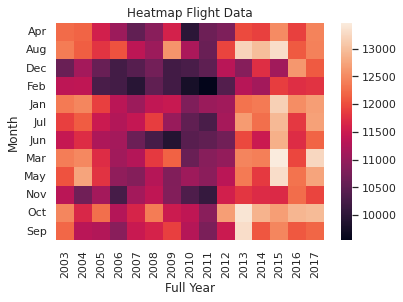

In [57]:
sns.set()
month_by_year = crime_month_year.pivot("Month", "Full Year", "IncidntNum")
ax = sns.heatmap(month_by_year)
plt.title("Crime Over Time")
plt.show()

In [101]:
heatmap_data = pd.pivot_table(crime_month_year, values='Total Number of Crimes Rounded', index=['Month'], columns='Full Year')

heatmap_data

Full Year,'03,'04,'05,'06,'07,'08,'09,'10,'11,'12,'13,'14,'15,'16,'17
Month,,,,,,,,,,,,,,,
Apr,12.3,12.2,11.6,11.1,10.5,10.9,11.6,10.0,10.6,10.8,12.0,11.9,12.5,11.9,12.5
Aug,12.4,12.1,11.8,12.0,11.4,11.1,12.6,11.2,10.6,11.9,13.2,13.0,13.3,12.1,12.4
Dec,10.6,11.1,10.6,10.2,10.4,10.7,10.2,10.3,10.5,11.3,10.9,11.7,11.1,12.6,12.1
Feb,11.4,11.4,10.3,10.2,10.0,10.5,10.2,9.8,9.5,10.4,11.3,11.1,11.9,11.7,11.8
Jan,12.4,12.5,11.9,11.3,11.1,11.4,11.5,10.8,11.1,11.1,12.3,12.4,13.2,12.5,12.7
Jul,11.9,12.1,11.5,11.3,11.4,11.9,11.0,10.5,10.3,11.2,12.7,12.3,12.9,11.8,12.7
Jun,11.5,11.7,11.2,11.1,10.6,10.3,9.9,10.4,10.5,10.7,12.0,11.5,12.9,11.7,12.2
Mar,12.4,12.5,11.7,11.1,11.3,11.8,12.2,10.6,10.9,11.0,12.5,12.4,13.5,11.9,13.2
May,12.0,12.7,11.8,11.0,10.8,11.3,10.8,11.1,10.9,11.3,12.4,11.8,13.3,12.3,12.8


In [102]:
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

heatmap_data = heatmap_data.reindex(ordered_months)

heatmap_data

Full Year,'03,'04,'05,'06,'07,'08,'09,'10,'11,'12,'13,'14,'15,'16,'17
Month,,,,,,,,,,,,,,,
Jan,12.4,12.5,11.9,11.3,11.1,11.4,11.5,10.8,11.1,11.1,12.3,12.4,13.2,12.5,12.7
Feb,11.4,11.4,10.3,10.2,10.0,10.5,10.2,9.8,9.5,10.4,11.3,11.1,11.9,11.7,11.8
Mar,12.4,12.5,11.7,11.1,11.3,11.8,12.2,10.6,10.9,11.0,12.5,12.4,13.5,11.9,13.2
Apr,12.3,12.2,11.6,11.1,10.5,10.9,11.6,10.0,10.6,10.8,12.0,11.9,12.5,11.9,12.5
May,12.0,12.7,11.8,11.0,10.8,11.3,10.8,11.1,10.9,11.3,12.4,11.8,13.3,12.3,12.8
Jun,11.5,11.7,11.2,11.1,10.6,10.3,9.9,10.4,10.5,10.7,12.0,11.5,12.9,11.7,12.2
Jul,11.9,12.1,11.5,11.3,11.4,11.9,11.0,10.5,10.3,11.2,12.7,12.3,12.9,11.8,12.7
Aug,12.4,12.1,11.8,12.0,11.4,11.1,12.6,11.2,10.6,11.9,13.2,13.0,13.3,12.1,12.4
Sep,12.2,11.3,11.3,10.9,11.5,11.6,11.9,11.3,10.8,11.5,13.3,12.1,12.5,12.1,12.2


In [32]:

#month_by_year = crime_month_year.pivot("Month", "Full Year", "IncidntNum")

#plt.figure(figsize = (15,8)

sns.cm.rocket_r

sns.set(font_scale=1.4, rc = {'figure.figsize':(18,9)})

heatmap = sns.heatmap(heatmap_data, annot=True, fmt='.1f')
plt.xlabel('')
plt.ylabel('')
plt.show()

heatmap.figure.savefig('Heatmap.png')

NameError: ignored

In [1]:
sf_crime

NameError: ignored

In [ ]:
full_crime = sf_crime.groupby(by = ['Full Year'], as_index=False)['IncidntNum'].count()